a280_NNHwith2OPT

Iteration 1049: Improved total distance to 1189.95
Iteration 1125: Improved total distance to 1184.21
Iteration 2203: Improved total distance to 1167.83
Iteration 3637: Improved total distance to 1160.50
Iteration 3728: Improved total distance to 1151.83
Iteration 3815: Improved total distance to 1144.82
Iteration 3898: Improved total distance to 1135.83
Iteration 3977: Improved total distance to 1129.72
Iteration 4052: Improved total distance to 1119.83
Iteration 4125: Improved total distance to 1115.50
Iteration 5794: Improved total distance to 1112.91
Iteration 5796: Improved total distance to 1112.49
Iteration 5797: Improved total distance to 1111.97
Iteration 5798: Improved total distance to 1106.47
Iteration 5883: Improved total distance to 1103.38
Iteration 6880: Improved total distance to 1099.06
Iteration 11487: Improved total distance to 1096.24


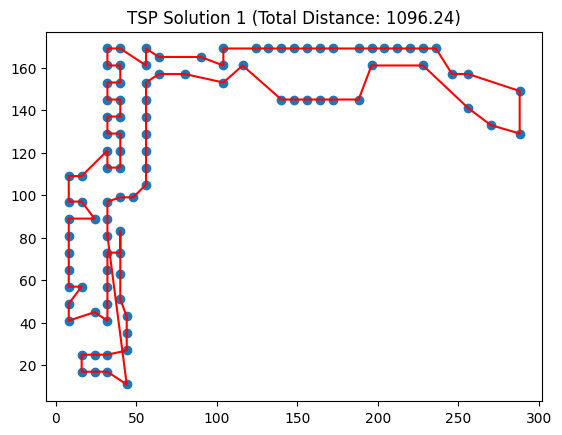

Iteration 81: Improved total distance to 1236.38
Iteration 658: Improved total distance to 1233.27
Iteration 752: Improved total distance to 1220.71
Iteration 837: Improved total distance to 1219.32
Iteration 1758: Improved total distance to 1214.99
Iteration 2276: Improved total distance to 1194.20
Iteration 2675: Improved total distance to 1192.87
Iteration 2892: Improved total distance to 1184.43
Iteration 2901: Improved total distance to 1184.31
Iteration 3454: Improved total distance to 1178.58
Iteration 4056: Improved total distance to 1162.20
Iteration 4734: Improved total distance to 1160.62
Iteration 4740: Improved total distance to 1149.62
Iteration 4766: Improved total distance to 1138.31
Iteration 4835: Improved total distance to 1130.43
Iteration 6505: Improved total distance to 1126.11
Iteration 8293: Improved total distance to 1125.88
Iteration 8766: Improved total distance to 1120.67
Iteration 8841: Improved total distance to 1120.48
Iteration 11102: Improved total dist

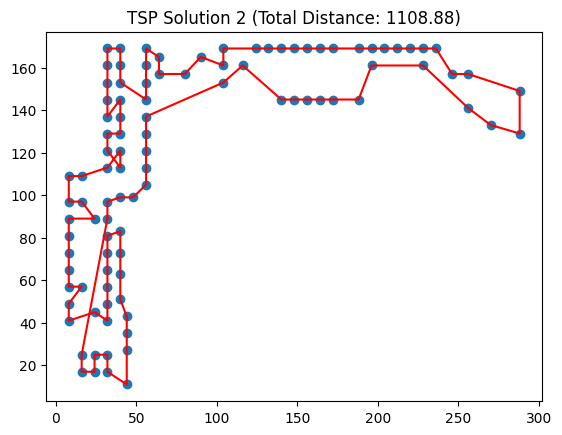

Iteration 6: Improved total distance to 1225.36
Iteration 348: Improved total distance to 1223.02
Iteration 662: Improved total distance to 1221.51
Iteration 672: Improved total distance to 1212.36
Iteration 687: Improved total distance to 1209.16
Iteration 1107: Improved total distance to 1208.84
Iteration 1596: Improved total distance to 1197.25
Iteration 2199: Improved total distance to 1195.67
Iteration 2925: Improved total distance to 1189.05
Iteration 3393: Improved total distance to 1188.39
Iteration 3629: Improved total distance to 1182.27
Iteration 3858: Improved total distance to 1181.23
Iteration 4053: Improved total distance to 1171.95
Iteration 4346: Improved total distance to 1165.56
Iteration 4347: Improved total distance to 1144.69
Iteration 4668: Improved total distance to 1128.31
Iteration 4806: Improved total distance to 1124.69
Iteration 5457: Improved total distance to 1121.78
Iteration 6430: Improved total distance to 1119.11
Iteration 6508: Improved total distanc

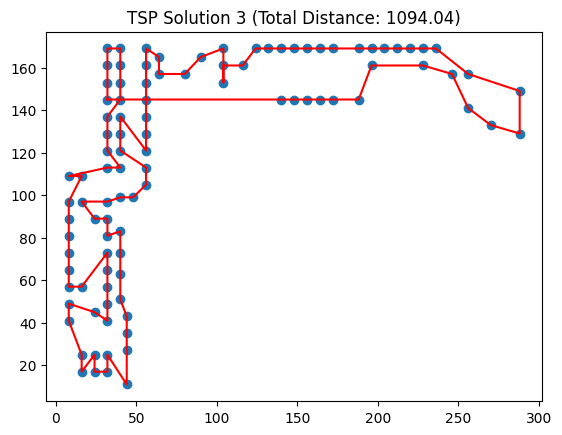

Iteration 81: Improved total distance to 1223.90
Iteration 379: Improved total distance to 1222.15
Iteration 750: Improved total distance to 1216.82
Iteration 1971: Improved total distance to 1206.57
Iteration 2060: Improved total distance to 1202.24
Iteration 2550: Improved total distance to 1181.45
Iteration 2925: Improved total distance to 1180.12
Iteration 3130: Improved total distance to 1171.68
Iteration 3139: Improved total distance to 1171.56
Iteration 3652: Improved total distance to 1165.83
Iteration 4198: Improved total distance to 1149.45
Iteration 4710: Improved total distance to 1142.82
Iteration 6817: Improved total distance to 1142.63
Iteration 6889: Improved total distance to 1137.43
Iteration 7032: Improved total distance to 1137.19
Iteration 7236: Improved total distance to 1133.10
Iteration 8947: Improved total distance to 1128.78
Iteration 8948: Improved total distance to 1126.56
Iteration 11632: Improved total distance to 1121.87
Iteration 11774: Improved total di

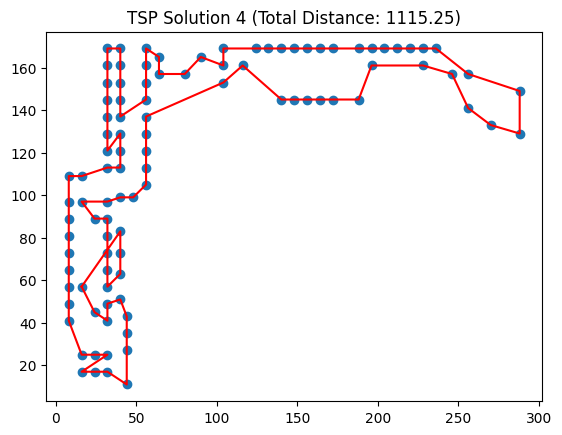

Iteration 206: Improved total distance to 1239.55
Iteration 288: Improved total distance to 1171.47
Iteration 487: Improved total distance to 1167.75
Iteration 530: Improved total distance to 1166.26
Iteration 542: Improved total distance to 1166.12
Iteration 543: Improved total distance to 1159.73
Iteration 622: Improved total distance to 1155.71
Iteration 623: Improved total distance to 1153.05
Iteration 1045: Improved total distance to 1150.97
Iteration 3530: Improved total distance to 1141.08
Iteration 5769: Improved total distance to 1139.14
Iteration 5777: Improved total distance to 1127.75
Iteration 5863: Improved total distance to 1126.00
Iteration 5947: Improved total distance to 1121.40
Iteration 6031: Improved total distance to 1119.65
Iteration 6113: Improved total distance to 1116.34
Iteration 6114: Improved total distance to 1113.53
Iteration 6195: Improved total distance to 1103.97
Iteration 6276: Improved total distance to 1102.22
Iteration 6355: Improved total distance

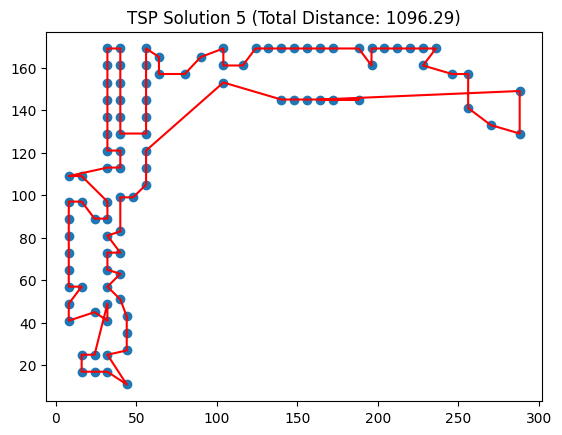

Average Tour Length: 1102.139209101578


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []

# Rerun TSP solving process 5 times
for i in range(5):
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution {i+1} (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print average tour length
average_tour_length = np.mean(total_distances)
print("Average Tour Length:", average_tour_length)


a280_NNHonly

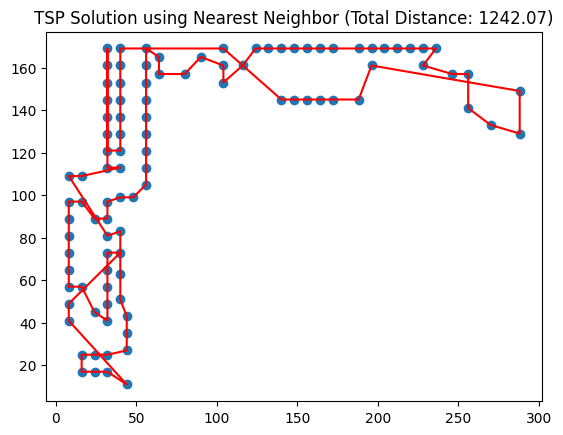

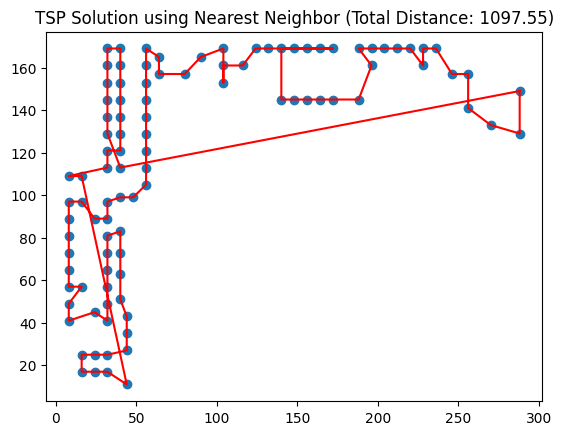

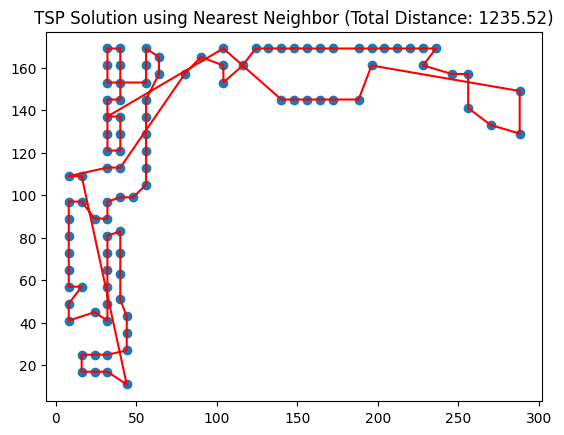

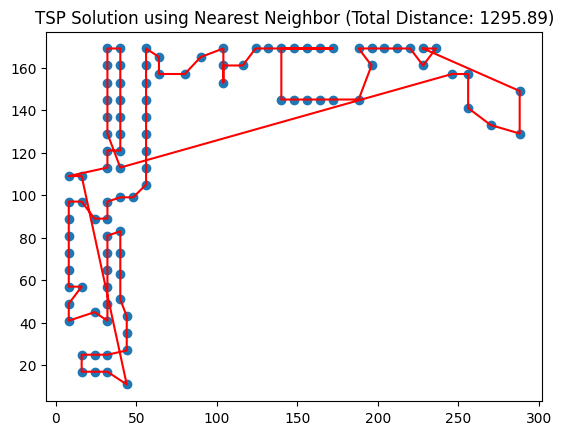

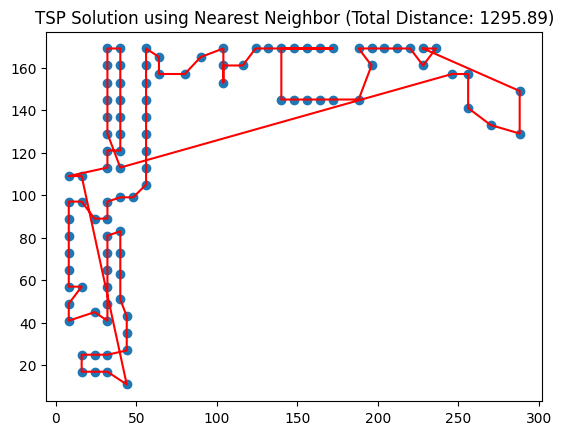

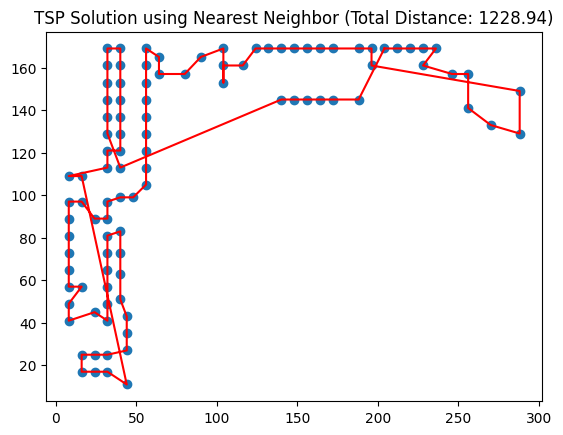

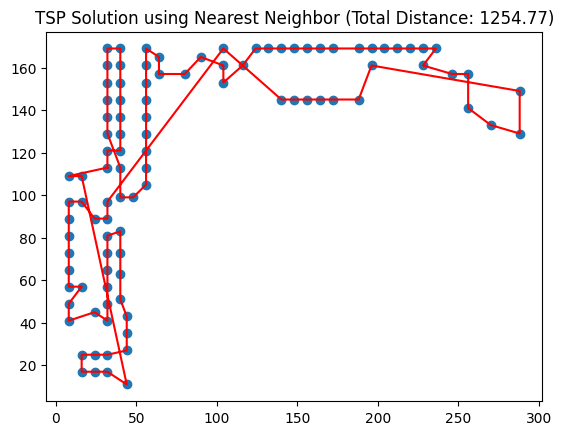

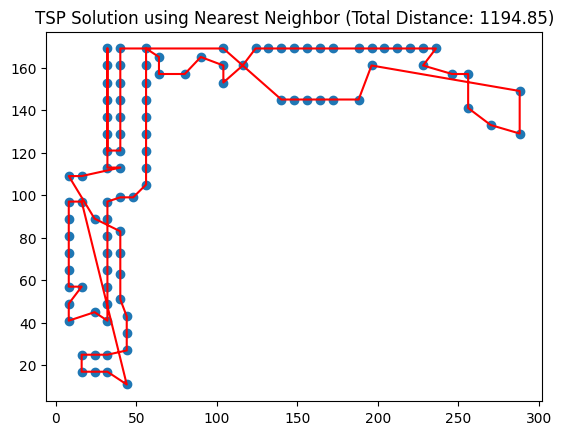

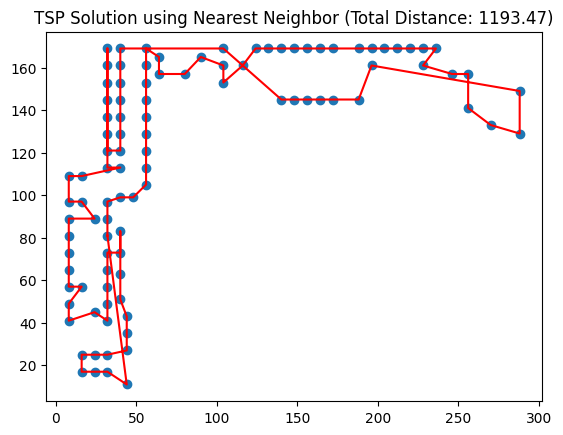

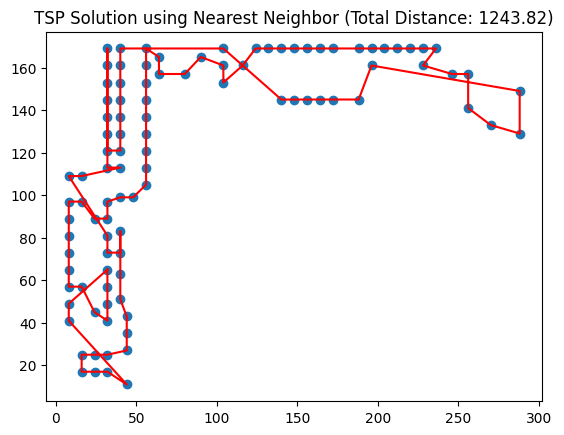

Average Tour Length: 1228.2755833954022


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
for i in range(10):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate average tour length
average_tour_length = np.mean(total_distances)
print("Average Tour Length:", average_tour_length)


a280_NNHwith3OPT

Iteration 338: Improved total distance to 1201.30
Iteration 43506: Improved total distance to 1197.90
Iteration 80065: Improved total distance to 1191.05
Iteration 143392: Improved total distance to 1171.81
Iteration 147431: Improved total distance to 1169.97
Iteration 147481: Improved total distance to 1168.46
Iteration 196276: Improved total distance to 1162.11
Iteration 297229: Improved total distance to 1134.85
Iteration 430211: Improved total distance to 1134.80
Iteration 573643: Improved total distance to 1123.32


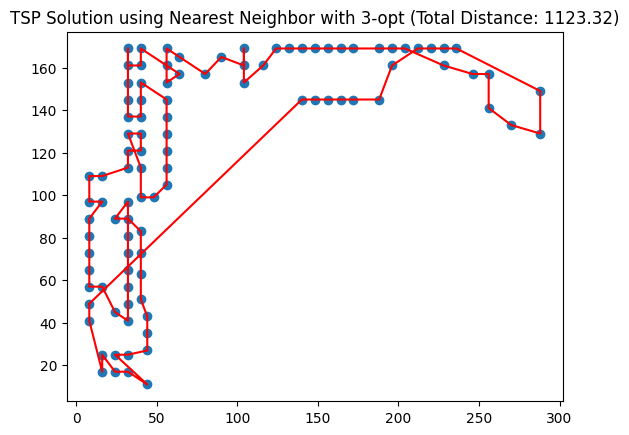

Iteration 14188: Improved total distance to 1190.71
Iteration 38639: Improved total distance to 1184.73
Iteration 97533: Improved total distance to 1181.11
Iteration 97590: Improved total distance to 1175.57
Iteration 188677: Improved total distance to 1174.63
Iteration 230083: Improved total distance to 1159.53
Iteration 230975: Improved total distance to 1157.20
Iteration 237807: Improved total distance to 1152.17
Iteration 240778: Improved total distance to 1136.27
Iteration 295057: Improved total distance to 1135.63


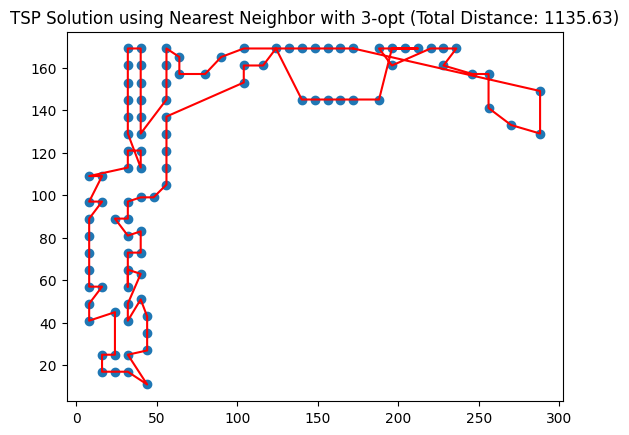

Iteration 130024: Improved total distance to 1071.22


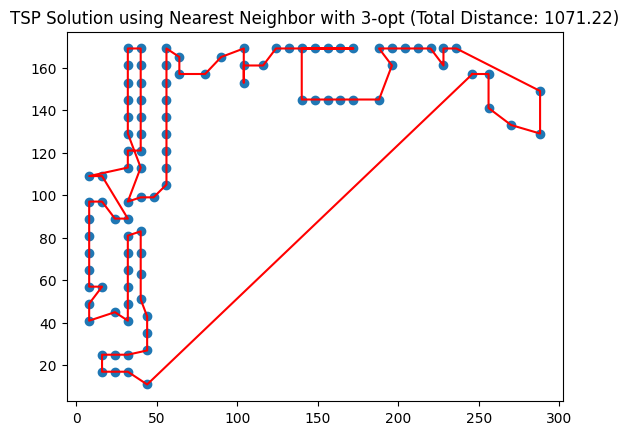

Average Tour Length: 1110.06


In [6]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances for three runs
total_distances = []

# Run the solver three times
for _ in range(3):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print the average total distance
average_distance = sum(total_distances) / len(total_distances)
print(f"Average Tour Length: {average_distance:.2f}")
